#  Assignment 4

## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|. | | |
|  | |. |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='link to your selfie'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


In [1]:
%matplotlib inline
import pandas as pd
import re
from lxml import etree 
from bz2file import BZ2File
import codecs
from collections import Counter

# P1 Parsing wikipedia

#### Hints: 
1. Gebruik de code uit `ParseWikipediaDump.ipynb` in de NoteBook folder.
2. Ontwikkel voor opgave 2:
    * eerst een versie met alleen pageid, titel en aantal woorden
    * ontwikkel de "sectie-extractor" apart op een stukje test file
    * voeg de sectie-extractor dan in je eerdere code in.


#### Opgaven
1. Haal de laatste NL wikipedia dump op van <https://dumps.wikimedia.org/nlwiki/20160111/>. **update: dit is van een eerder jaar. Verwijder de datum uit de URL, kijke wat je krijgt,  en klik op de laatste datum. Wij werken in 2017 met <https://dumps.wikimedia.org/nlwiki/20170301/>**  Je hebt de file <https://dumps.wikimedia.org/nlwiki/20160111/nlwiki-20160111-pages-articles.xml.bz2> nodig, maar kunt als je dat wat groot vindt eerst beginnen met <https://dumps.wikimedia.org/nlwiki/20160111/nlwiki-20160111-pages-articles1.xml.bz2>
2. We gaan een dataframe maken met informatie over **elke** pagina in de NL wikipedia. Dit dataframe bevat voor elke pagina de volgende 4 kolommen:
    1. page id (dit wordt de index)
    2. titel van de pagina
    3. het aantal secties  (dus geen subsecties en dergelijke)
    4. een lijst met alle namen van de secties.
    5. het aantal woorden op de pagina (geef duidelijk in woorden aan wat je hieronder verstaat).
2. Gebuik `%time` om te timen hoe lang je programma er over doet. Zorg dat dit duidelijk in je notebook staat. Laat ook zien hoe groot je bestand is. 
    * aantal regels, aantal kolommen, aantal cellen met missende data. 
3. Sla dit dataframe op als pickle bestand. Laat met een commando (denk aan magics) zien hoe groot het is in een voor mensen leesbare eenheid (dus niet in Bytes als het meerdere Mb groot is.
3. Sla je dataframe op als csv bestand en probeer het in te lezen in Word of Openoffice en in Google spreadsheets. Rapporteer exact wat er gebeurt.
4. Maak een plot waarin je op de x-as het aantal secties zet en op de y-as het aantal paginas met zoveel secties. Zorg dat het goed leesbaar is door eventueel een log schaal te gebruiken.
5. Bereken het gemiddeld aantal secties, de mediaan, en de standaard deviatie, en geef de titel van (een?) pagina met het maximale aantal secties, en geef dat maximale aantal natuurlijk. 
    * Hoeveel paginas hebben geen secties? 
    * Is dat dan een missing data (`NaN`) of `0`. Wat is eigenlijk het verschil?
6. Plot het aantal secties tegen het aantal woorden en bereken de correlatie.
7. Wat is het gemiddeld aantal woorden per sectie op NL Wikipedia?
    * Geef eerst een sluitende definitie in woorden van dit begrip. En programmeer die dan. Wees niet te snel blij en klaar. Dit is nog best tricky. 
8. **Sectie namen**
    1. Tel voor alle sectie titels hoe vaak ze voorkomen. Laat de top 10 meest voorkomende secties zien. 
    2. Plot de sectietitels (x-as) tegen hun count (y-as) in loglog style en ga na of dat min of meer een rechte lijn is. 
        * Zo ja, dan is dit hoogstwaarschijnlijk een _power law_ (ook wel _Zipf_-verdeling genoemd) verdeling.
        * Kan je verklaren waarom sectietitels powerlaw verdeeld zijn?

#### Hint
* Denk na of de waarden die je vind ergens op slaan.
* Het is echt niet voldoende dat je het commando `df.mean()` kent. Het is echt de bedoeling dat je 

#### Voorbeeld
Voor <https://nl.wikipedia.org/wiki/Albert_Speer> ziet dit er (op dit moment van schrijven) als volgt uit:
1. page id is $1$
2. titel is _Albert Speer_
3. Aantal secties is 12
4. Sectie titels zijn (maar dan zonder de nummering)
```
1	Voor 1933
2	In dienst van Hitler
3	Speer de organisator
4	Hitlers laatste bevelen aan Speer
5	Arrestatie en gevangenisstraf
6	Speer als de 'nette nazi'
7	Nalatenschap
8	Het einde van de mythe
9	Wetenswaardig
10	Publicaties
11	Literatuur
12	Film
```


 
    
    

In [2]:
c= 0
dumps = 'nlwiki-20170301-pages-articles1.xml.bz2'
with BZ2File(dumps) as xml_file:
    for line in xml_file:
        print line
        c += 1
        if c == 400:
            break

<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.10/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.10/ http://www.mediawiki.org/xml/export-0.10.xsd" version="0.10" xml:lang="nl">

  <siteinfo>

    <sitename>Wikipedia</sitename>

    <dbname>nlwiki</dbname>

    <base>https://nl.wikipedia.org/wiki/Hoofdpagina</base>

    <generator>MediaWiki 1.29.0-wmf.13</generator>

    <case>first-letter</case>

    <namespaces>

      <namespace key="-2" case="first-letter">Media</namespace>

      <namespace key="-1" case="first-letter">Speciaal</namespace>

      <namespace key="0" case="first-letter" />

      <namespace key="1" case="first-letter">Overleg</namespace>

      <namespace key="2" case="first-letter">Gebruiker</namespace>

      <namespace key="3" case="first-letter">Overleg gebruiker</namespace>

      <namespace key="4" case="first-letter">Wikipedia</namespace>

      <namespace key="5" case="first-letter">O

In [3]:
c= 0
dumps = 'nlwiki-20170301-pages-articles1.xml.bz2'
sectionpattern = re.compile(r'^==([\w\s].*?)==$', re.MULTILINE)
infoboxpattern = re.compile(r'{{Infobox[\s\S]*?}}[\n][^|]', re.MULTILINE)
with BZ2File(dumps) as xml_file:
    context = etree.iterparse(xml_file,  tag= '{http://www.mediawiki.org/xml/export-0.10/}page')
    for _, elem in context:
                page_id  = elem.findtext('{http://www.mediawiki.org/xml/export-0.10/}id') 
                title    = elem.findtext('{http://www.mediawiki.org/xml/export-0.10/}title') 
                content  = elem.find('{http://www.mediawiki.org/xml/export-0.10/}revision')
                text     = content.findtext('{http://www.mediawiki.org/xml/export-0.10/}text')
                sections = [i for i in re.findall(sectionpattern, text) if len(i) > 0]
                text = re.sub(r'<ref(.*?)</ref>', "", text)
                text = re.sub(infoboxpattern, "", text)
                text = re.sub(r'{{Appendix[\s\S]*', "", text)
                #text = re.sub(r'\[\[Bestand(.*?)\]\]', "asdf", text)
                print type(text)
                c+=1
                if c == 3:
                    break

<type 'unicode'>
<type 'unicode'>
<type 'unicode'>


In [4]:
var = unicode('Hoi dit is een ding')
print len(var.split(" "))

5


In [5]:
c= 0
L = []

def wikiframe():

    with BZ2File(dumps) as xml_file:    
        context = etree.iterparse(xml_file,  tag= '{http://www.mediawiki.org/xml/export-0.10/}page')
        for _, elem in context:
                    # Pageid
                    page_id = elem.findtext('{http://www.mediawiki.org/xml/export-0.10/}id') 
                    # Title
                    title= elem.findtext('{http://www.mediawiki.org/xml/export-0.10/}title')
                    # Sections
                    text = elem.findtext('{http://www.mediawiki.org/xml/export-0.10/}revision/{http://www.mediawiki.org/xml/export-0.10/}text')
                    # Only take Head sections, not subsections!
                    sectionpattern = re.compile(r'^==([\w\s].*?)==$', re.MULTILINE)
                    sec = [i for i in re.findall(sectionpattern, text) if len(i) > 0]
                    # Amount of Words: we considered all words which are displayed within the page except for those in the infobox 
                    # and everything starting from the appendix, as this is not the content itself
                    # Remove references
                    text = re.sub(r'<ref>(.*?)</ref>', "", text)
                    # Remove appendix if present
                    appendix = re.compile(r'{{Appendix[\s\S]*')
                    text = re.sub(appendix, "", text)
                    # Remove Infobox if present
                    infobox = re.compile(r'{{Infobox[\s\S]*?}}[\n][^|]')
                    text = re.sub(infobox, "", text)
                    wordcount = len(text.split(" "))
                    

                    L.append((page_id, title, len(sec), sec, wordcount))
                
                    # now get rid of the element and also delete all its ancestors   
                    # from http://stackoverflow.com/questions/12160418/why-is-lxml-etree-iterparse-eating-up-all-my-memory
                    elem.clear()
                    # Also eliminate now-empty references from the root node to elem
                    for ancestor in elem.xpath('ancestor-or-self::*'):
                        while ancestor.getprevious() is not None:
                            del ancestor.getparent()[0]    
                
        del context
        df = pd.DataFrame(L, columns = ('Page_ID', 'Titel', 'Aantal_Secties', 'Sectienamen', 'Aantal_Woorden'))
        df = df.set_index('Page_ID')
        return df
                                    
%time df = wikiframe()
df.head()

Wall time: 3min 32s


Titel  Aantal_Secties  \
Page_ID                                   
1          Albert Speer              10   
2          Andre Agassi               5   
5        Groen (partij)               5   
6        Anthony Fokker               4   
7        Albert Plesman               4   

                                               Sectienamen  Aantal_Woorden  
Page_ID                                                                     
1        [ Voor 1933 ,  Architect in dienst van Hitler ...            3250  
2        [ Biografie ,  Palmares ,  Onderscheidingen , ...            5675  
5        [ Geschiedenis ,  Structuur ,  Politieke manda...            2116  
6        [ Levensloop ,  Trivia ,  Bibliografie ,  Exte...             915  
7          [Levensloop, Eerbewijzen, Diversen, Zijn gezin]             836

In [6]:
#3

# See above for time

# Rows, Columns
print df.shape

# Amount of cells with missing values
print sum(df.isnull().values.ravel())

(121585, 4)
0


In [7]:
#4

# Convert to pickle
# df.to_pickle('wikipickle.pkl')

# File Size
# size = os.stat('wikipickle.pkl').st_size 
# print (float(size) / 1000000), "mb"
!ls -sh wikipickle.pkl

13M wikipickle.pkl


In [8]:
# df.to_csv('wikifile.csv', encoding='utf-8')

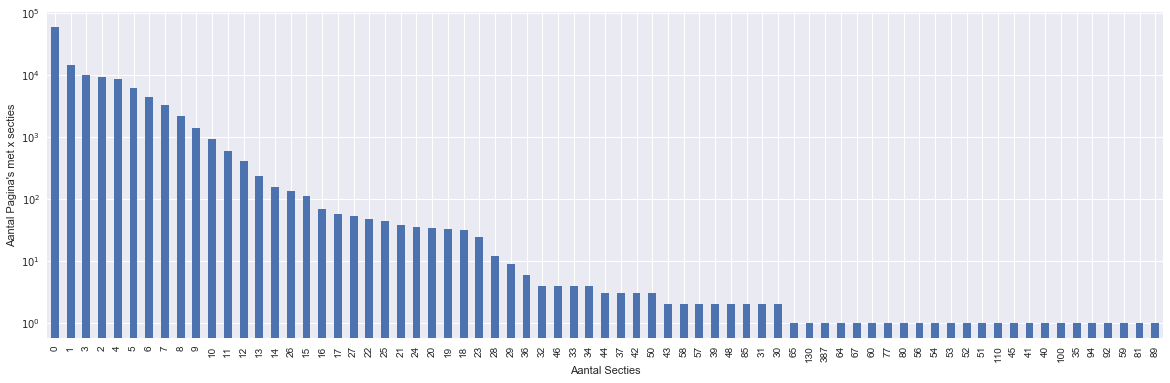

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

"""x-as het aantal secties zet en op de y-as het aantal paginas met zoveel secties"""

ax = df.Aantal_Secties.value_counts().plot(kind='bar', figsize=(20,6), logy=True)
ax.set_xlabel("Aantal Secties")
ax.set_ylabel("Aantal Pagina's met x secties")


Aantal_Secties  Aantal_Woorden
Aantal_Secties        1.000000        0.569062
Aantal_Woorden        0.569062        1.000000

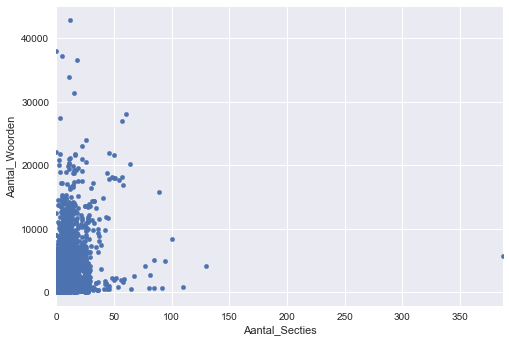

In [22]:
#8

import numpy as np
df = df.query("Aantal_Woorden < 50000")
ax = df.sort_values(by='Aantal_Secties').plot(kind='scatter', x="Aantal_Secties", y="Aantal_Woorden", legend=False)
ax.set_xlim(0, df.Aantal_Secties.max())
ax.set_xlabel("Aantal_Secties")
ax.set_ylabel("Aantal_Woorden")

# Correlatie = 0.474353
df.corr()

In [19]:
df.sort_values(by='Aantal_Woorden', ascending=False)

Titel  Aantal_Secties  \
Page_ID                                                                      
3295            Wikipedia:Archief/Wikipedia:Upload logboek               0   
70295    Wikipedia:Archief/Wikipedia:Upload logboek/Arc...               0   
70420    Wikipedia:Archief/Wikipedia:Upload logboek/Arc...               0   
50737    Wikipedia:Archief/Wikipedia:Upload logboek arc...               0   
11326                                Rooms-Katholieke Kerk              12   
70419    Wikipedia:Archief/Wikipedia:Upload logboek/Arc...               0   
139298                                      Isle of Man TT               5   
1741     Wikipedia:Te verwijderen pagina's/archief/2003...              18   
137046                          Geschiedenis van de wereld              11   
32646            Wikipedia:Aanmelding moderatoren/archief1              15   
109473                 Wikipedia:De kroeg/Archief 20041204              60   
77047              Wikipedia:Sterren voor bewezen diensten               3   
104488   Wikipedia:Archief - De kroeg 2004 - november n...              57   
46954                                    Lijst van opera's              26   
756                                         Hermann Göring              22   
85297          Wikipedia:Archief/Wikipedia:Blokkeerlogboek               0   
96066    Wikipedia:Archief - De kroeg 2004 - september ...              46   
1823                                            Vlaanderen              16   
10409                               Hollywood Walk of Fame               3   
95568                   Wikipedia:Achterkamertje/archief 1              16   
215176                 Wikipedia:De kroeg/Archief 20050711              50   
41781                                           Noordlaren              12   
201617                  Wikipedia:Achterkamertje/archief 4              22   
1214                            Geschiedenis van Nederland              11   
82684    Lijst van olympische medaillewinnaars atletiek...               2   
57970                                   Lijst van vlinders              26   
83                                            Adolf Hitler              11   
88641    Wikipedia:Archief - De kroeg 2004 - september ...              64   
8413                                      Jom Kipoeroorlog              11   
84354        Lijst van olympische medaillewinnaars zwemmen               2   
...                                                    ...             ...   
165732                                         Roosterfout               0   
165737                                          Stapelwolk               0   
27718                                          Hersonissos               0   
27719                                           Hersonisos               0   
165011                                            Jezuiten               0   
216932                                              Alfene               0   
164305                               Provincies van Zweden               0   
204094                                      Arkadiklooster               0   
63772                                              Asturie               0   
63774                                             Asturies               0   
164341                                       Telebankieren               0   
63816                                  Categorie:Zeestraat               0   
204061                                        Oudegyptisch               0   
97217                                   Kasteel Beverweerd               0   
63822                                       Categorie:Meer               0   
63836                                      Categorie:Heide               0   
63837                                   Categorie:Woestijn               0   
97162                                        Singel (stad)               0   
96953                                             Koorhemd               0 

[('Zie ook', 17261), ('Externe links', 13898), ('Externe link', 10439), ('Geschiedenis', 8952), ('Geboren', 4488), ('Geografie', 3608), ('Gebeurtenissen', 3240), ('Overleden', 3220), ('Literatuur', 3073), ('Trivia', 3027), ('Biografie', 2718), ('Bezienswaardigheden', 1757), ('Discografie', 1596), ('Referenties', 1545), ('Levensloop', 1458), ('Kenmerken', 1418), ('Bibliografie', 1338), ('Politiek', 1261), ('Bronnen', 1195), ('Noten', 1062), ('Afbeeldingen', 964), ('Demografie', 936), ('Economie', 934), ('Bronvermelding', 818), ('Sport', 771), ('Beschrijving', 761), ('Voetnoten', 737), ('Bouwkunst', 707), ('Cultuur', 707), ('Toepassingen', 701)]


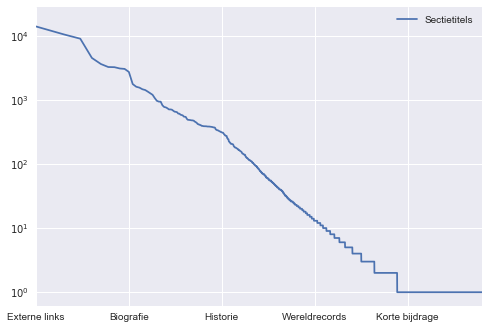

In [11]:

#10

#A

# Take all pages with sections
sectiesonly = df[df.Aantal_Secties >=1]

# Take only the section titles
titlelist = sectiesonly['Sectienamen']

l = []
for titles in titlelist:
    for title in titles:  
        l.append(title.encode('utf-8').strip())

# Top 10
count = Counter(l)
print count.most_common(n=30)

#B

#Convert count to Dictionary
dicty = dict(count)

frame = pd.DataFrame.from_dict(dicty, orient = 'index')
frame.columns = ["Sectietitels"]

frame.sort_values(by='Sectietitels', ascending=False).plot(loglog=True)



In [12]:
# Sectie namen
# Tel voor alle sectie titels hoe vaak ze voorkomen. Laat de top 10 meest voorkomende secties zien.
# Plot de sectietitels (x-as) tegen hun count (y-as) in loglog style en ga na of dat min of meer een rechte lijn is.
# Zo ja, dan is dit hoogstwaarschijnlijk een power law (ook wel Zipf-verdeling genoemd) verdeling.
# Kan je verklaren waarom sectietitels powerlaw verdeeld zijn?